In [4]:
import math
from draw_radar import read_cwb_radar_sweep
from pyart.graph import RadarMapDisplayBasemap

In [5]:
# 五分山雷達站的經緯度
center_lat = 25.071182
center_lon = 121.781205

radius_km = 200

# 計算經緯度範圍
lat_range = radius_km / 111  # 每緯度約為 111 公里
lon_range = radius_km / (111 * math.cos(math.radians(center_lat)))  # 每經度距離依緯度變化

LAT_MIN = center_lat - lat_range
LAT_MAX = center_lat + lat_range
LON_MIN = center_lon - lon_range
LON_MAX = center_lon + lon_range

unzip files
header: (b'RCWFRCWFRCWFRCWF', 100, 76600, 2507, 12177, 202100, 1200, 3100, 2300, 5100, 3700, 842, 21500, 100, 0, 36000, 46000, 0, 100, 212500, 100000, 1000, -9900, 0, 0, 0, 0, 0, 0, 1178948163, 0, 0, 0, 0, 5915236, 1113849856, 90)
rlat: 25.07
rlon: 121.77
data_shape: (360, 460)


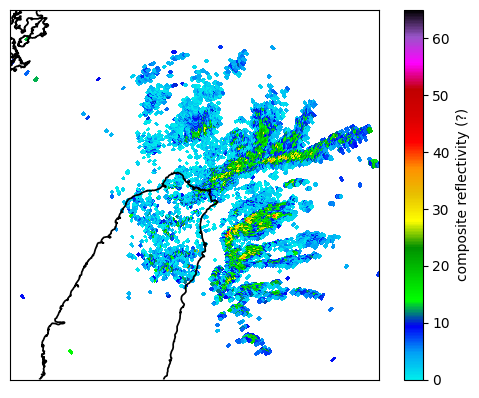

In [8]:
radar_data_path = 'data/RCWF.20211231.2351.cref.00.gz'
radar_data = read_cwb_radar_sweep(radar_data_path)
display = RadarMapDisplayBasemap(radar_data)
display.plot_ppi_map(
    list(radar_data.fields.keys())[0],
    cmap='pyart_NWSRef',
    sweep=0,
    resolution='h',
    vmin=0,
    vmax=65,
    min_lon=LON_MIN,
    max_lon=LON_MAX,
    min_lat=LAT_MIN,
    max_lat=LAT_MAX,
    mask_outside=True,
    projection='aeqd',
    colorbar_flag=True,
    title_flag=False
)